In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score

In [33]:
movies_data = pd.read_csv("/content/IMDb Movies India.csv", encoding='ISO-8859-1')


In [34]:
# Data Analysis
print("Data Information:")
print(movies_data.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [35]:
print("\nFirst 5 rows of the data:")
print(movies_data.head())



First 5 rows of the data:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  

In [37]:
# Check column names
print("Column Names:")
print(movies_data.columns)


Column Names:
Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [38]:
# Summary statistics of ratings
print("\nSummary Statistics of Ratings:")
print(movies_data['Rating'].describe())





Summary Statistics of Ratings:
count    7919.000000
mean        5.841621
std         1.381777
min         1.100000
25%         4.900000
50%         6.000000
75%         6.800000
max        10.000000
Name: Rating, dtype: float64


In [39]:
# Check for missing values
print("\nNull value analysis:")
print(movies_data.isnull().sum())


Null value analysis:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [40]:
# Check data types
print("\nData Types:")
print(movies_data.dtypes)



Data Types:
Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


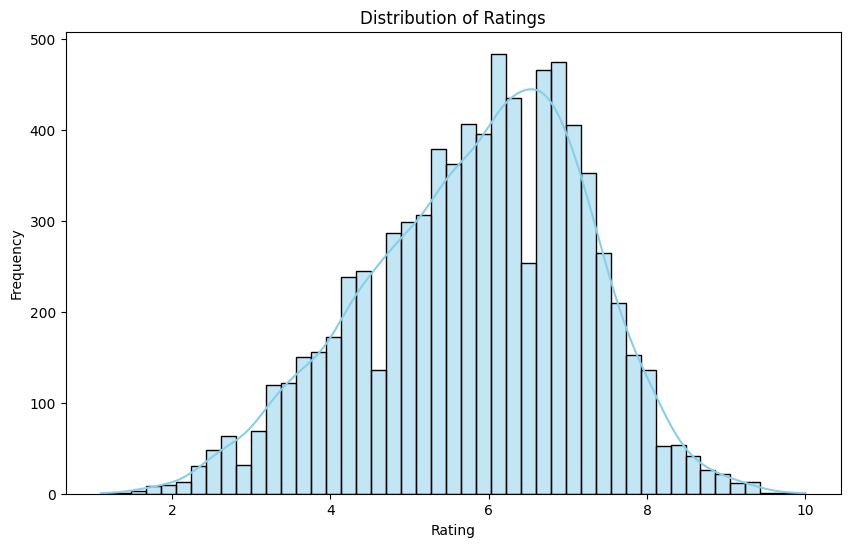

In [41]:
# Data Visualization
# Histogram of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['Rating'], kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [46]:
movies_data.fillna(0, inplace=True)

In [49]:
# Convert all columns to strings
movies_data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']] = movies_data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']].astype(str)

# Encode categorical features like genre, director, and actors using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(movies_data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']])

# Split the Data into training and testing sets
X = encoded_features
y = movies_data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [50]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)



Mean Squared Error: 16.010191679443853


In [52]:


# Convert predicted ratings to discrete values (e.g., rounding to nearest integer)
y_pred_discrete = np.round(y_pred)

# Convert actual ratings to discrete values
y_test_discrete = np.round(y_test)

# Compute accuracy
accuracy = accuracy_score(y_test_discrete, y_pred_discrete)

# Compute F1 score
f1 = f1_score(y_test_discrete, y_pred_discrete, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.17440361057382334
F1 Score: 0.25004648154975484
